In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mcopt import MorseComplex, MorseGraph, MorseHypergraph, ot

# Construct Morse Graphs

In [12]:
mg = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/sinusoidal')).sample(5)
mg_noisy = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/sinusoidal_noisy')).sample(5)

In [20]:
mh = MorseHypergraph.from_graph(mg, construction='neighbors')
mh_noisy = MorseHypergraph.from_graph(mg_noisy, construction='neighbors')

## Initial Graphs

Text(0.5, 1.0, 'Noisy Morse Graph')

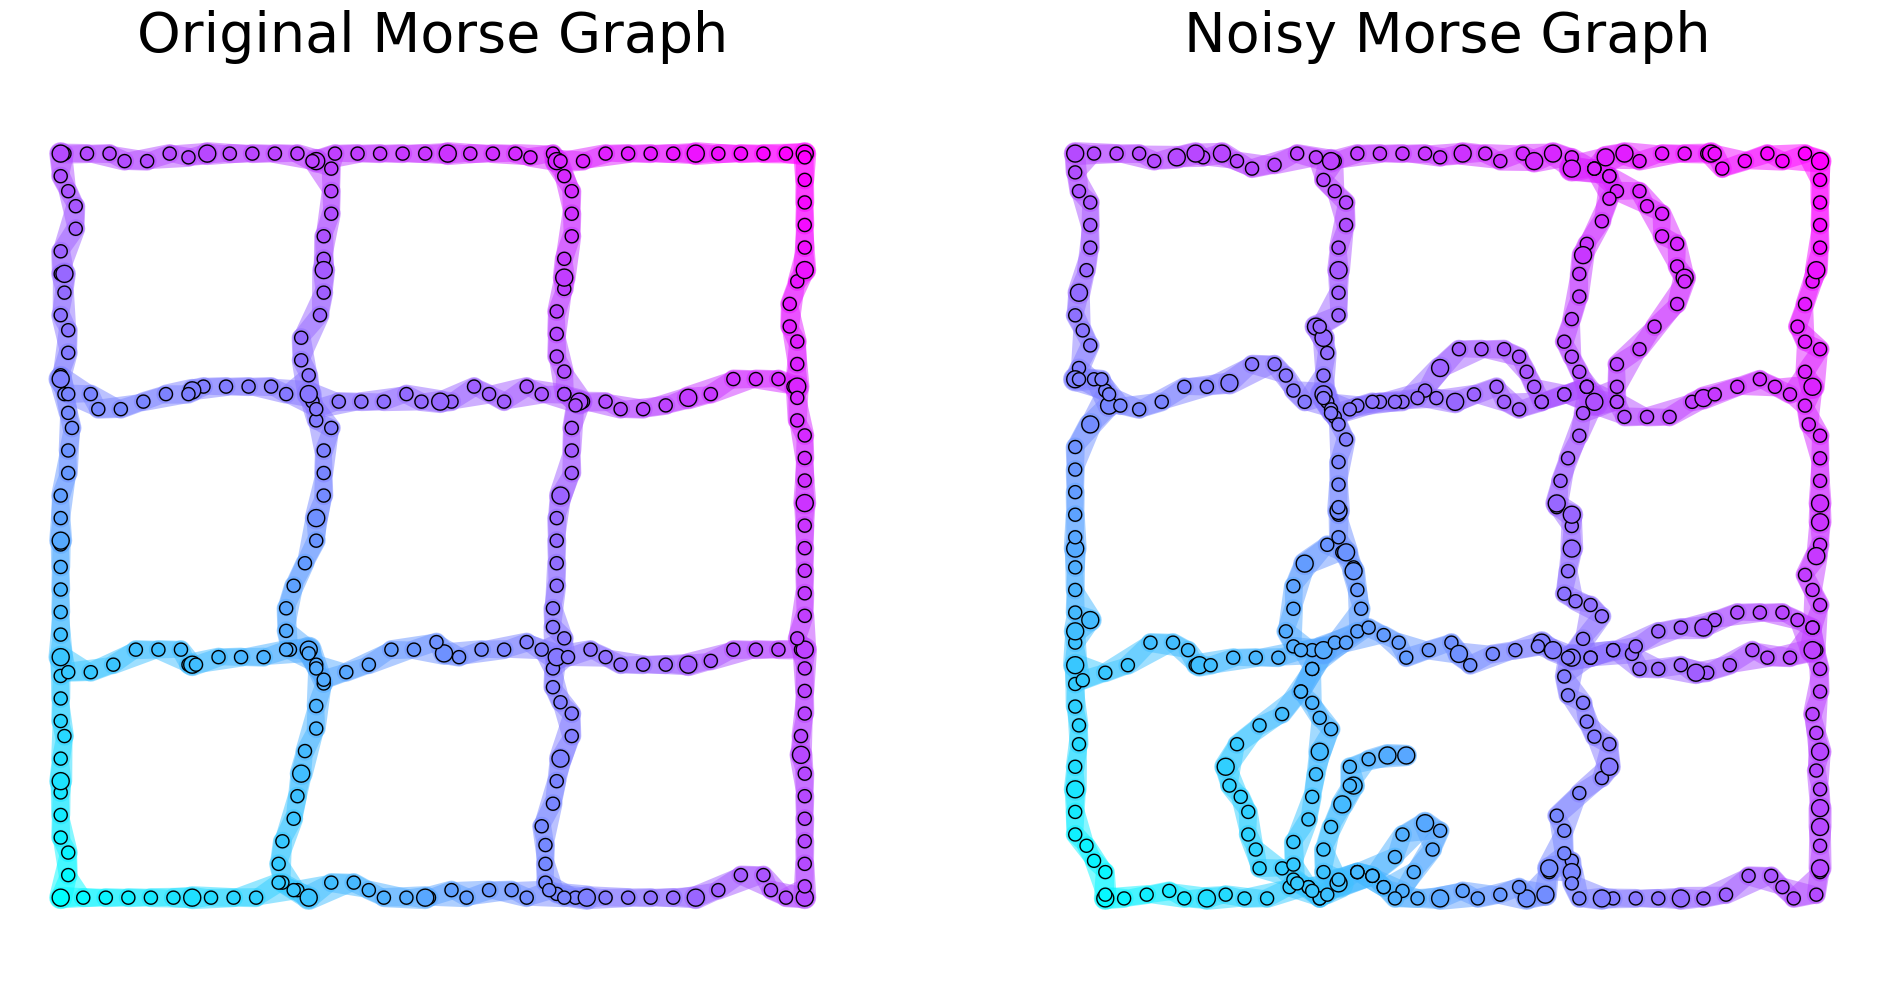

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mh.draw(ax=axes[0], node_size=20, cmap=cmap)
axes[0].set_title('Original Morse Graph', fontsize=40)

mh_noisy.draw(ax=axes[1], node_size=20, cmap=cmap)
axes[1].set_title('Noisy Morse Graph', fontsize=40)

In [22]:
mh_space = mh.to_mph()
mh_noisy_space = mh_noisy.to_mph()

/workspaces/MCOpt/mcopt/morse_graph.py:457: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  weights = nx.adjacency_matrix(lg, weight=weight_type).A
/workspaces/MCOpt/mcopt/morse_graph.py:457: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  weights = nx.adjacency_matrix(lg, weight=weight_type).A


In [23]:
node_coupling, edge_coupling, _ = ot.cGW(mh_space, mh_noisy_space, random_G0=True, random_state=42)

Text(0.5, 1.0, 'Noisy Morse Graph')

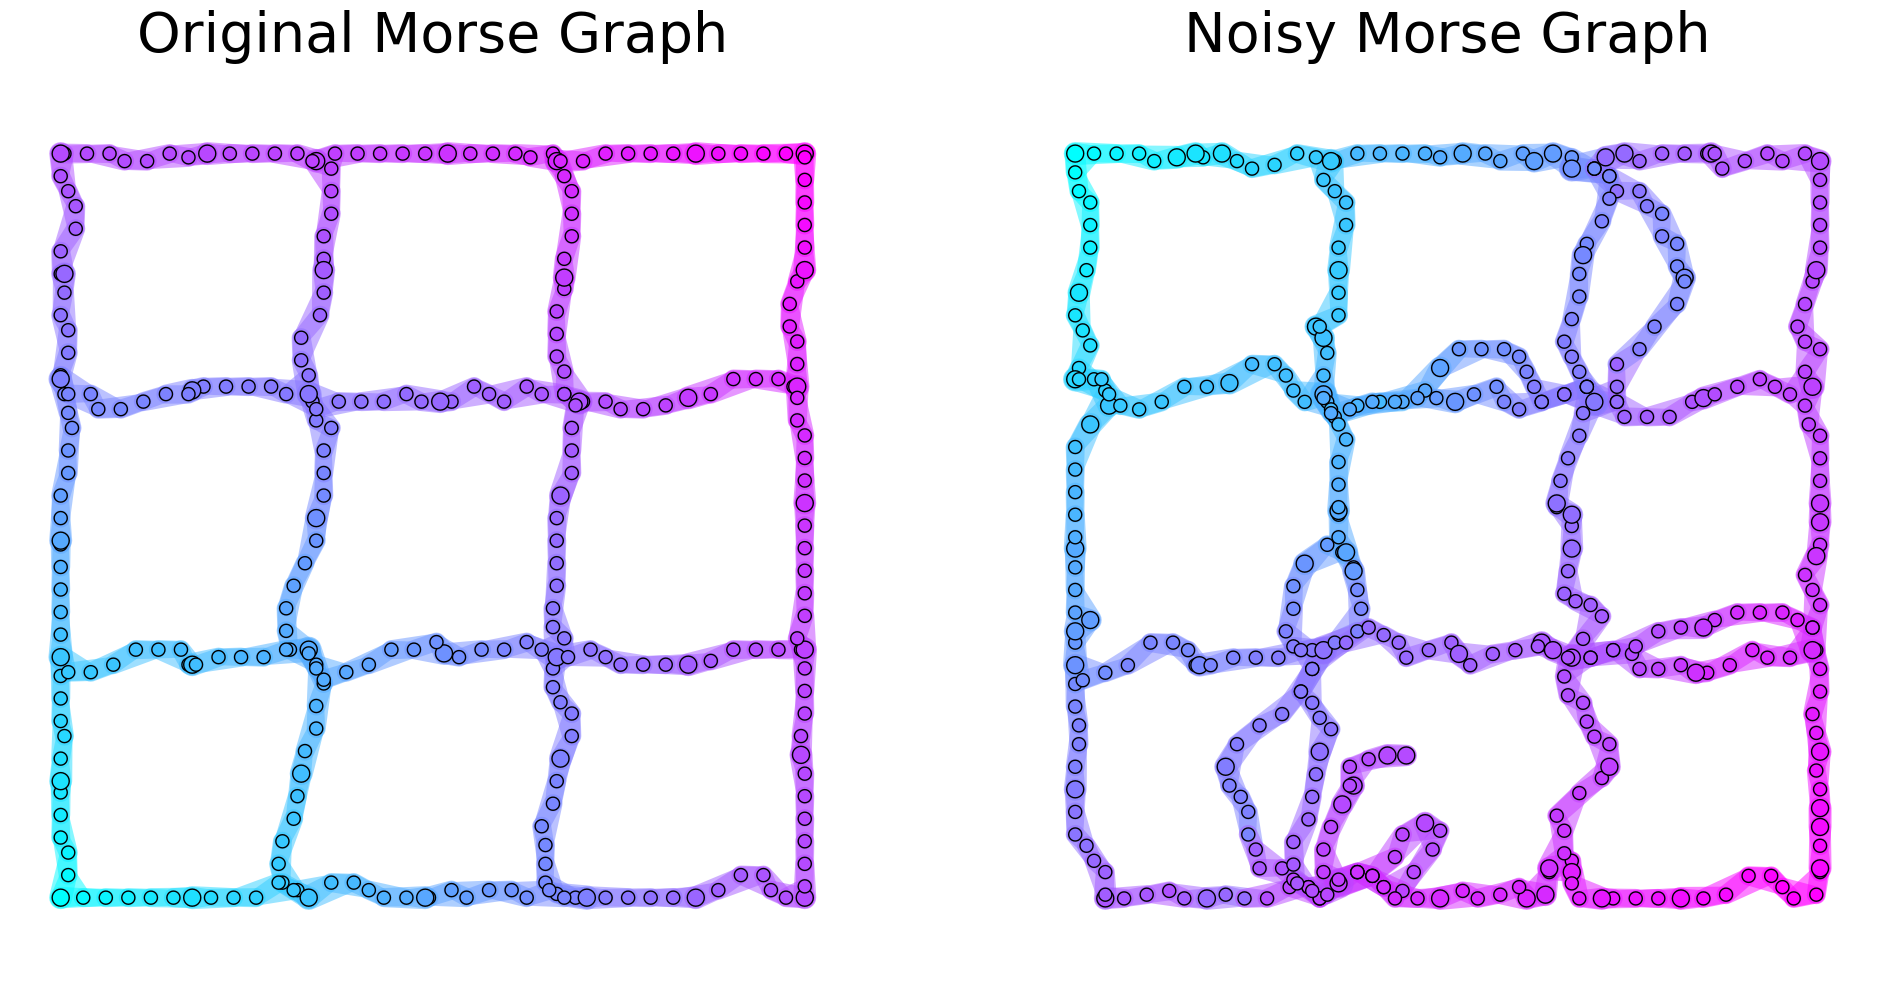

In [24]:
mh_node_color = mh.node_color_by_position()
mh_edge_color = mh.edge_color_by_nodes(mh_node_color)

fig, axes = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mh.draw(
  ax=axes[0], 
  node_size=20, 
  node_color=mh_node_color,
  edge_color=mh_edge_color,
  cmap=cmap
)
axes[0].set_title('Original Morse Graph', fontsize=40)

mh_noisy.draw(
  ax=axes[1], 
  node_size=20, 
  node_color=mh_noisy.node_color_by_coupling(mh_node_color, node_coupling),
  edge_color=mh_noisy.edge_color_by_coupling(mh_edge_color, edge_coupling),
  cmap=cmap
)
axes[1].set_title('Noisy Morse Graph', fontsize=40)